## Prediktif Model Menggunakan Regresi dan Clustering pada Sales Kalbe Nutritionals

#### Import Common Package

In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Read DataFrame (csv) as pd

In [213]:
df_customer = pd.read_csv(".\Final_Project\Dataset\Case_Study_Customer.csv", sep=";")
df_product = pd.read_csv(".\Final_Project\Dataset\Case_Study_Product.csv", sep=";")
df_store = pd.read_csv(".\Final_Project\Dataset\Case_Study_Store.csv", sep=";")
df_transaction = pd.read_csv(".\Final_Project\Dataset\Case_Study_Transaction.csv", sep=";")

#### Data Cleansing

#### Data Cleaning untuk df_customer

In [214]:
df_customer.head()

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,"5,12"
1,2,60,1,Married,"6,23"
2,3,32,1,Married,"9,17"
3,4,31,1,Married,"4,87"
4,5,58,1,Married,"3,57"


In [215]:
df_customer.describe()

,CustomerID,Age,Gender
count,447.000000,447.000000,447.000000
mean,224.000000,39.782998,0.458613
std,129.182042,12.848719,0.498842
min,1.000000,0.000000,0.000000
25%,112.500000,30.000000,0.000000
50%,224.000000,39.000000,0.000000
75%,335.500000,50.500000,1.000000
max,447.000000,72.000000,1.000000


In [216]:
# Check missing data
df_customer.isna().sum()

CustomerID        0
Age               0
Gender            0
Marital Status    3
Income            0
dtype: int64

In [217]:
df_customer['Marital Status'].unique()

array(['Married', nan, 'Single'], dtype=object)

In [218]:
df_customer['Marital Status'].value_counts()/len(df_customer['Marital Status'])

Married    0.760626
Single     0.232662
Name: Marital Status, dtype: float64

In [219]:
# Berdasarkan data wrangling pada kolom Marital Status, terdapat 76% dengan status Married.
# Maka asumsikan NaN value dengan 'Married'
df_customer['Marital Status'] = df_customer['Marital Status'].fillna("Married")

In [220]:
df_customer['Marital Status'].unique()

array(['Married', 'Single'], dtype=object)

In [221]:
# Cek data duplicate
df_customer.duplicated().sum()

0

In [222]:
# Cek data type
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      447 non-null    int64 
 1   Age             447 non-null    int64 
 2   Gender          447 non-null    int64 
 3   Marital Status  447 non-null    object
 4   Income          447 non-null    object
dtypes: int64(3), object(2)
memory usage: 17.6+ KB


In [223]:
# Perbaiki tipe data
for i in range(len(df_customer['Income'])):
    df_customer['Income'][i] = df_customer['Income'][i].replace(",", ".")

C:\Users\Axel\AppData\Local\Temp\ipykernel_24812\1277257718.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_customer['Income'][i] = df_customer['Income'][i].replace(",", ".")


In [224]:
df_customer['Income']

0       5.12
1       6.23
2       9.17
3       4.87
4       3.57
       ...  
442     9.28
443    15.31
444    14.48
445     7.81
446    20.37
Name: Income, Length: 447, dtype: object

In [225]:
df_customer['Income'] = df_customer['Income'].astype(float)

In [226]:
# Cek data type
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      447 non-null    int64  
 1   Age             447 non-null    int64  
 2   Gender          447 non-null    int64  
 3   Marital Status  447 non-null    object 
 4   Income          447 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 17.6+ KB


#### Data Cleaning untuk df_product

In [227]:
df_product.head()

,ProductID,Product Name,Price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200


In [228]:
df_product.describe()

,Price
count,10.000000
mean,10410.000000
std,4890.455557
min,3200.000000
25%,7825.000000
50%,9700.000000
75%,14250.000000
max,18000.000000


In [229]:
df_product.isna().sum()

ProductID       0
Product Name    0
Price           0
dtype: int64

In [230]:
# Cek data duplicate
df_product.duplicated().sum()

0

In [231]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     10 non-null     object
 1   Product Name  10 non-null     object
 2   Price         10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes


#### Data Cleaning untuk df_store

In [232]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StoreID     14 non-null     int64 
 1   StoreName   14 non-null     object
 2   GroupStore  14 non-null     object
 3   Type        14 non-null     object
 4   Latitude    14 non-null     object
 5   Longitude   14 non-null     object
dtypes: int64(1), object(5)
memory usage: 800.0+ bytes


In [148]:
df_store.describe()

,StoreID
count,14.0000
mean,7.5000
std,4.1833
min,1.0000
25%,4.2500
50%,7.5000
75%,10.7500
max,14.0000


In [233]:
df_store.isna().sum()

StoreID       0
StoreName     0
GroupStore    0
Type          0
Latitude      0
Longitude     0
dtype: int64

In [234]:
df_store.duplicated().sum()

0

#### Data Cleaning untuk df_transaction

In [235]:
df_transaction.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4


In [236]:
df_transaction.describe()

,CustomerID,Price,Qty,TotalAmount,StoreID
count,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000
mean,221.263745,9684.800797,3.644622,32279.482072,7.489841
std,129.672955,4600.708780,1.855295,19675.462455,4.028502
min,1.000000,3200.000000,1.000000,7500.000000,1.000000
25%,108.000000,4200.000000,2.000000,16000.000000,4.000000
50%,221.000000,9400.000000,3.000000,28200.000000,7.000000
75%,332.000000,15000.000000,5.000000,47000.000000,11.000000
max,447.000000,18000.000000,10.000000,88000.000000,14.000000


In [237]:
df_transaction.isna().sum()

TransactionID    0
CustomerID       0
Date             0
ProductID        0
Price            0
Qty              0
TotalAmount      0
StoreID          0
dtype: int64

In [238]:
df_transaction.duplicated().sum()

0

In [239]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  5020 non-null   object
 1   CustomerID     5020 non-null   int64 
 2   Date           5020 non-null   object
 3   ProductID      5020 non-null   object
 4   Price          5020 non-null   int64 
 5   Qty            5020 non-null   int64 
 6   TotalAmount    5020 non-null   int64 
 7   StoreID        5020 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 313.9+ KB


In [240]:
# Perbaiki tipe data untuk Date
df_transaction['Date'] = df_transaction['Date'].astype('datetime64')

c:\Users\Axel\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '13/01/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\Axel\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '14/01/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\Axel\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '15/01/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\Axel\AppData\Local\Programs\Python\Python310\lib\site-packages\p

In [241]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   TransactionID  5020 non-null   object        
 1   CustomerID     5020 non-null   int64         
 2   Date           5020 non-null   datetime64[ns]
 3   ProductID      5020 non-null   object        
 4   Price          5020 non-null   int64         
 5   Qty            5020 non-null   int64         
 6   TotalAmount    5020 non-null   int64         
 7   StoreID        5020 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 313.9+ KB


#### Merge DataFrame

In [243]:
df_merge = df_transaction.merge(df_customer, how='left')

In [244]:
df_merge = df_merge.merge(df_product, how='left')

In [245]:
df_merge = df_merge.merge(df_store, how='left')

In [247]:
# Check missing values
df_merge.head().isna().sum()

TransactionID     0
CustomerID        0
Date              0
ProductID         0
Price             0
Qty               0
TotalAmount       0
StoreID           0
Age               0
Gender            0
Marital Status    0
Income            0
Product Name      0
StoreName         0
GroupStore        0
Type              0
Latitude          0
Longitude         0
dtype: int64

#### Grouping Qty pada df_merge

In [271]:
df_agg = df_merge.groupby("Date").agg('sum')

In [308]:
# Membuat permodelan dengan frekuensi day, week, months
df_agg_day = df_merge.groupby("Date").agg('sum')
df_agg_week = df_agg.resample('W', convention='end').agg('sum')
df_agg_month = df_agg.resample('M', convention='end').agg('sum')

In [309]:
df_agg_day.head()

,CustomerID,Price,Qty,TotalAmount,StoreID,Age,Gender,Income
Date,,,,,,,,
2022-01-01,2740,124300,49,431200,88,494,7,103.83
2022-01-02,2625,75600,50,317300,93,517,7,98.78
2022-01-03,5271,143600,76,544500,144,716,6,128.16
2022-01-04,5810,271900,98,921400,196,1097,12,237.56
2022-01-05,4237,166500,67,476400,146,815,11,154.10
...,...,...,...,...,...,...,...,...
2022-12-27,4281,172100,70,647300,126,598,14,94.47
2022-12-28,3543,179000,68,599000,143,668,11,119.73
2022-12-29,3733,161300,42,437900,107,567,6,104.90


In [310]:
df_agg_week.head()

,CustomerID,Price,Qty,TotalAmount,StoreID,Age,Gender,Income
Date,,,,,,,,
2022-01-02,5365,199900,99,748500,181,1011,14,202.61
2022-01-09,29301,1165200,490,3905300,968,5159,70,1021.97
2022-01-16,29230,1330100,426,4190100,861,5030,64,1118.42
2022-01-23,20720,877200,332,2985100,673,3449,33,779.29
2022-01-30,21037,1020700,357,3233600,741,4129,48,893.32


In [283]:
df_agg_month.head()

,CustomerID,Price,Qty,TotalAmount,StoreID,Age,Gender,Income
Date,,,,,,,,
2022-01-31,108889,4726800,1763,15600500,3529,19420,235,4208.98
2022-02-28,86796,3916100,1524,13245400,3079,16604,178,3829.02
2022-03-31,93410,4105100,1551,14118900,3381,16856,197,3547.98
2022-04-30,87210,3629700,1447,12421400,2933,15828,191,3295.91
2022-05-31,87869,4029200,1543,13462400,3181,16707,187,3563.47


In [311]:
df_qty_day = df_agg_day['Qty']
df_qty_week = df_agg_week['Qty']
df_qty_month = df_agg_month['Qty']

<AxesSubplot:xlabel='Date'>

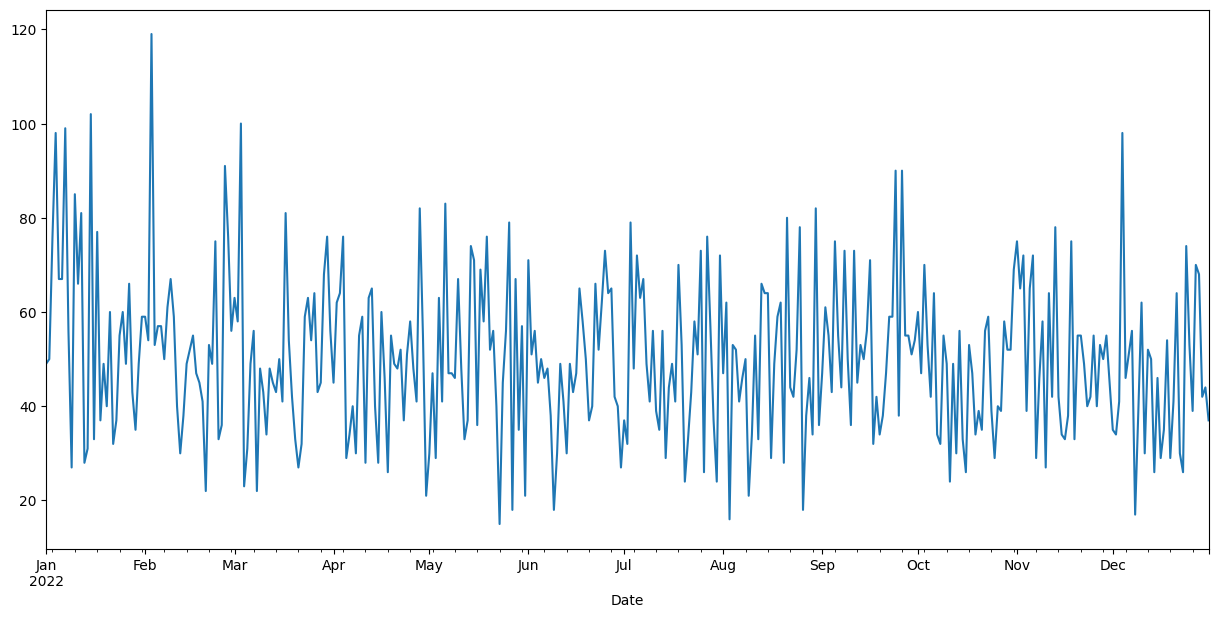

In [313]:
# Plotting Day
from pylab import rcParams
rcParams['figure.figsize'] = 15, 7
df_qty_day.plot()

<AxesSubplot:xlabel='Date'>

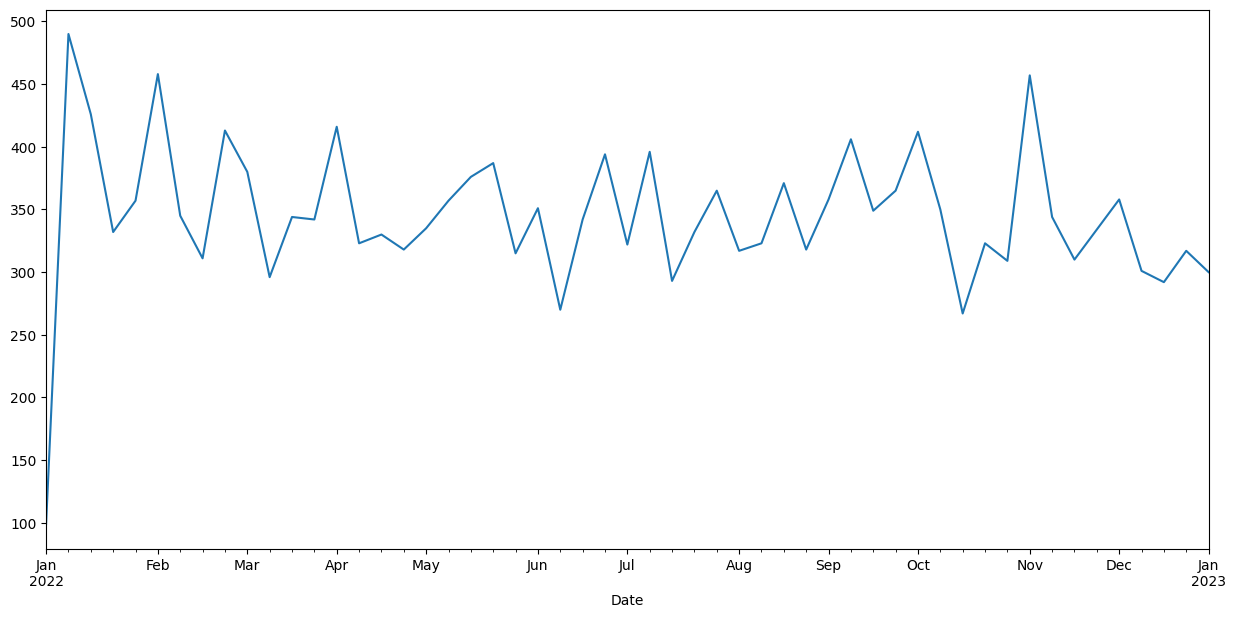

In [314]:
# Plotting Week
from pylab import rcParams
rcParams['figure.figsize'] = 15, 7
df_qty_week.plot()

<AxesSubplot:xlabel='Date'>

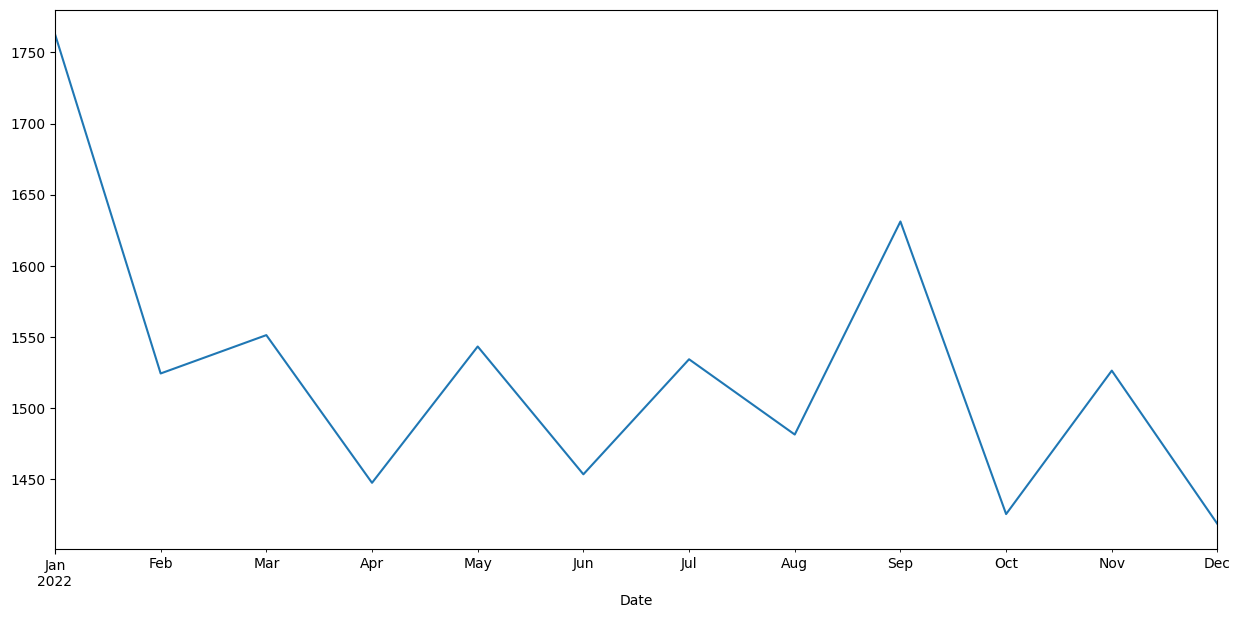

In [312]:
# Plotting Month
from pylab import rcParams
rcParams['figure.figsize'] = 15, 7
df_qty_month.plot()

#### Machine Learning Regression (ARIMA)

In [315]:
# Mengecek apakah dataset stationer
from statsmodels.tsa.stattools import adfuller

df_model_d = df_qty_day.copy()
df_model_w = df_qty_week.copy()
df_model_m = df_qty_month.copy()

test_result_d=adfuller(df_model_d)
test_result_w=adfuller(df_model_w)
test_result_m=adfuller(df_model_m)

- H0: The null hypothesis: It is a statement about the population that either is believed to be true or is used to put forth an argument unless it can be shown to be incorrect beyond a reasonable doubt.

- H1: The alternative hypothesis: It is a claim about the population that is contradictory to H0 and what we conclude when we reject H0.

- #Ho: It is non-stationary
- #H1: It is stationary

In [316]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")

adfuller_test(df_model_d)
adfuller_test(df_model_w)
adfuller_test(df_model_m)

ADF Test Statistic : -19.018782802299725
p-value : 0.0
#Lags Used : 0
Number of Observations : 364
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary
ADF Test Statistic : -10.275592976117181
p-value : 3.898390032180198e-18
#Lags Used : 0
Number of Observations : 52
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary
ADF Test Statistic : -2.0238438749150953
p-value : 0.2762172281310422
#Lags Used : 2
Number of Observations : 9
weak evidence against null hypothesis,indicating it is non-stationary 


In [322]:
df_model_d = pd.DataFrame(df_model_d)
df_model_w = pd.DataFrame(df_model_w)
df_model_m = pd.DataFrame(df_model_m)

In [323]:
df_model_d['Sales First Difference'] = df_model_d['Qty'] - df_model_d['Qty'].shift(1)
df_model_d['Seasonal First Difference'] = df_model_d['Qty'] - df_model_d['Qty'].shift(7)
df_model_d.head()

,Qty,Sales First Difference,Seasonal First Difference
Date,,,
2022-01-01,49,NaN,NaN
2022-01-02,50,1.0,NaN
2022-01-03,76,26.0,NaN
2022-01-04,98,22.0,NaN
2022-01-05,67,-31.0,NaN


In [326]:
df_model_w['Sales First Difference'] = df_model_w['Qty'] - df_model_m['Qty'].shift(1)
df_model_w['Seasonal First Difference'] = df_model_w['Qty'] - df_model_w['Qty'].shift(4)
df_model_w.head()

,Qty,Sales First Difference,Seasonal First Difference
Date,,,
2022-01-02,99,NaN,NaN
2022-01-09,490,NaN,NaN
2022-01-16,426,NaN,NaN
2022-01-23,332,NaN,NaN
2022-01-30,357,NaN,258.0


In [327]:
df_model_m['Sales First Difference'] = df_model_m['Qty'] - df_model_m['Qty'].shift(1)
df_model_m['Seasonal First Difference'] = df_model_m['Qty'] - df_model_m['Qty'].shift(3)
df_model_m.head()

,Qty,Sales First Difference,Seasonal First Difference
Date,,,
2022-01-31,1763,NaN,NaN
2022-02-28,1524,-239.0,NaN
2022-03-31,1551,27.0,NaN
2022-04-30,1447,-104.0,-316.0
2022-05-31,1543,96.0,19.0


In [328]:
# Again testing if data is stationary
adfuller_test(df_model_d['Seasonal First Difference'].dropna())
adfuller_test(df_model_w['Seasonal First Difference'].dropna())
adfuller_test(df_model_m['Seasonal First Difference'].dropna())

ADF Test Statistic : -8.953618787356522
p-value : 8.590878135579078e-15
#Lags Used : 13
Number of Observations : 344
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary
ADF Test Statistic : -5.114487846376653
p-value : 1.3108474209202564e-05
#Lags Used : 3
Number of Observations : 45
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary
ADF Test Statistic : -0.5299383966446684
p-value : 0.8860406301024779
#Lags Used : 2
Number of Observations : 6
weak evidence against null hypothesis,indicating it is non-stationary 


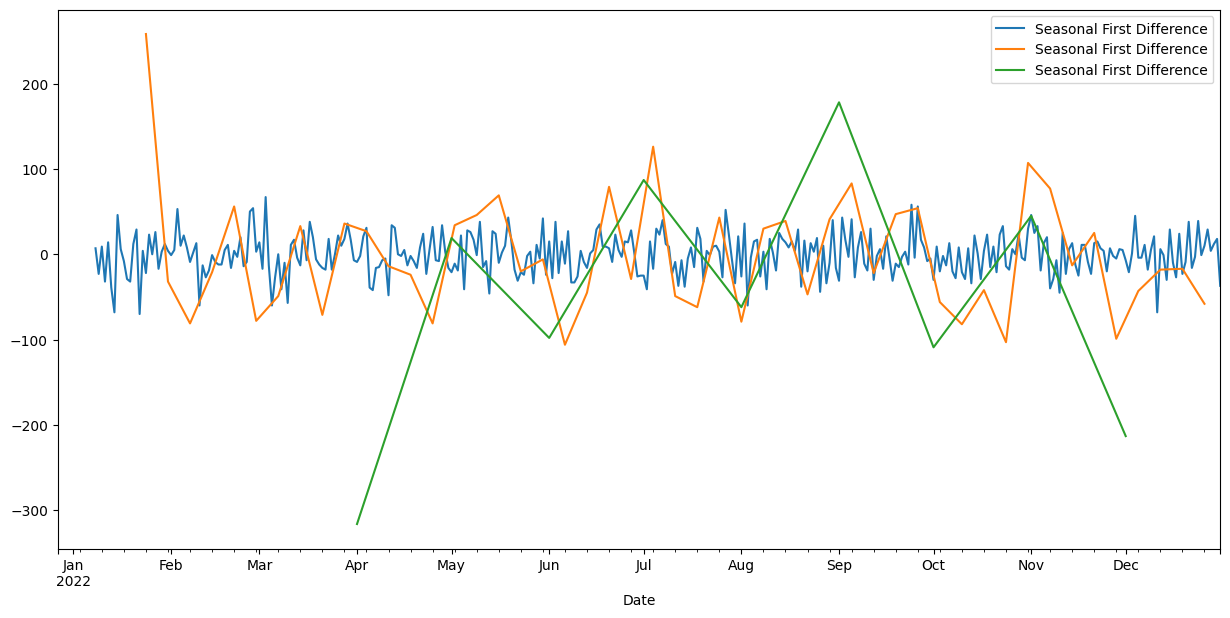

In [333]:
df_model_d['Seasonal First Difference'].plot()
df_model_w['Seasonal First Difference'].plot()
df_model_m['Seasonal First Difference'].plot()
plt.legend()

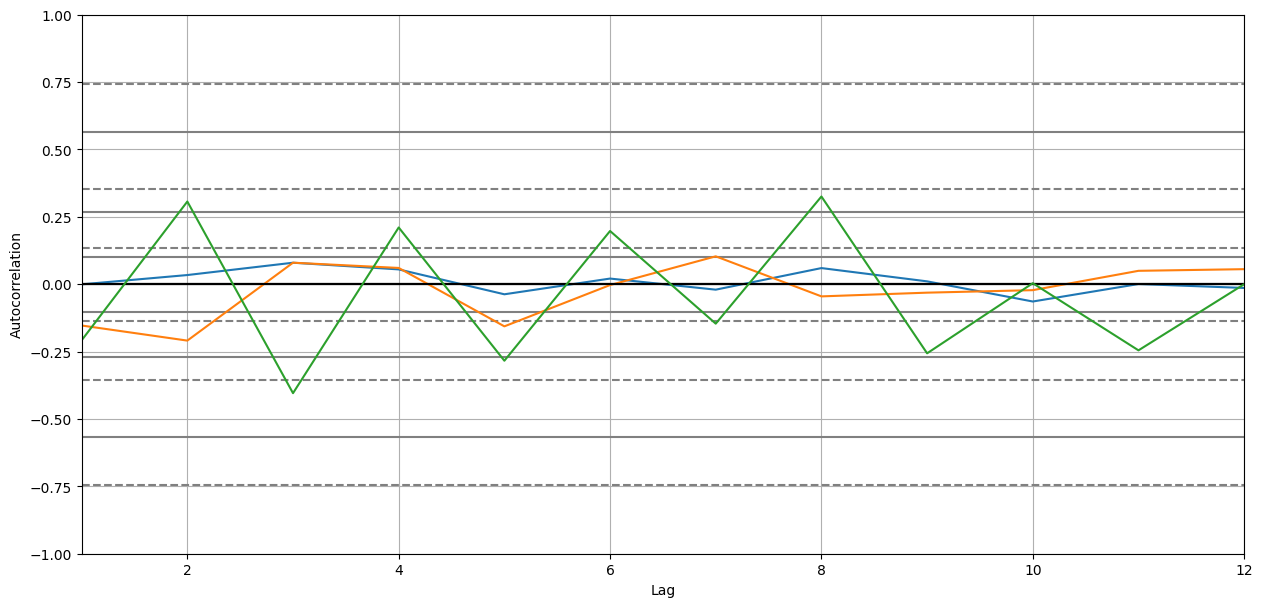

In [334]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_model_d['Qty'])
autocorrelation_plot(df_model_w['Qty'])
autocorrelation_plot(df_model_m['Qty'])
plt.show()

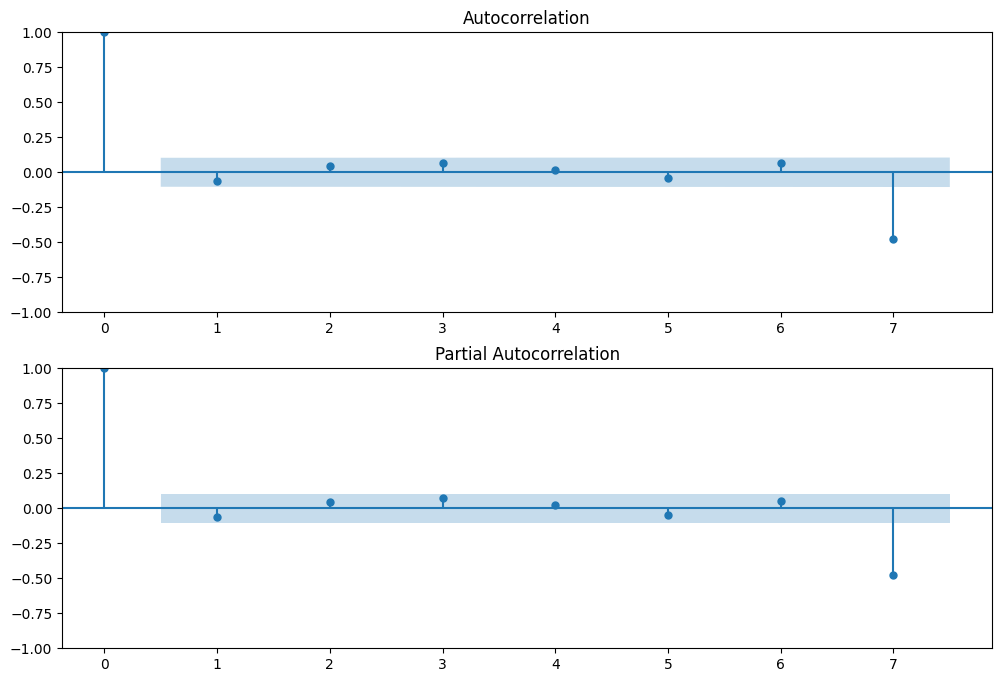

In [337]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_model_d['Seasonal First Difference'].dropna(),lags=7,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_model_d['Seasonal First Difference'].dropna(),lags=7,ax=ax2)

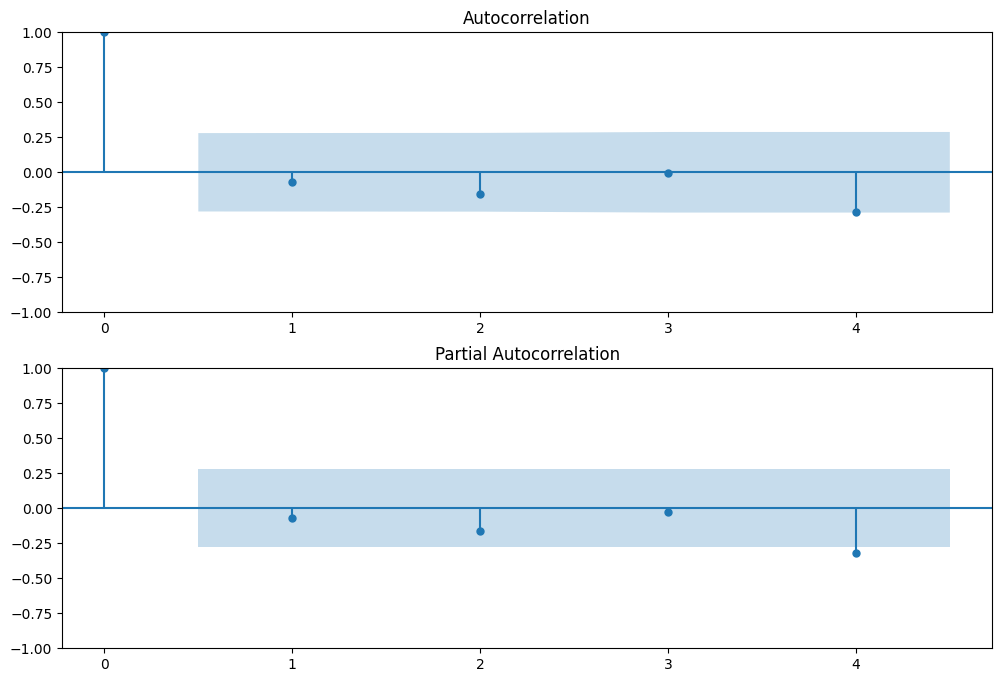

In [338]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_model_w['Seasonal First Difference'].dropna(),lags=4,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_model_w['Seasonal First Difference'].dropna(),lags=4,ax=ax2)

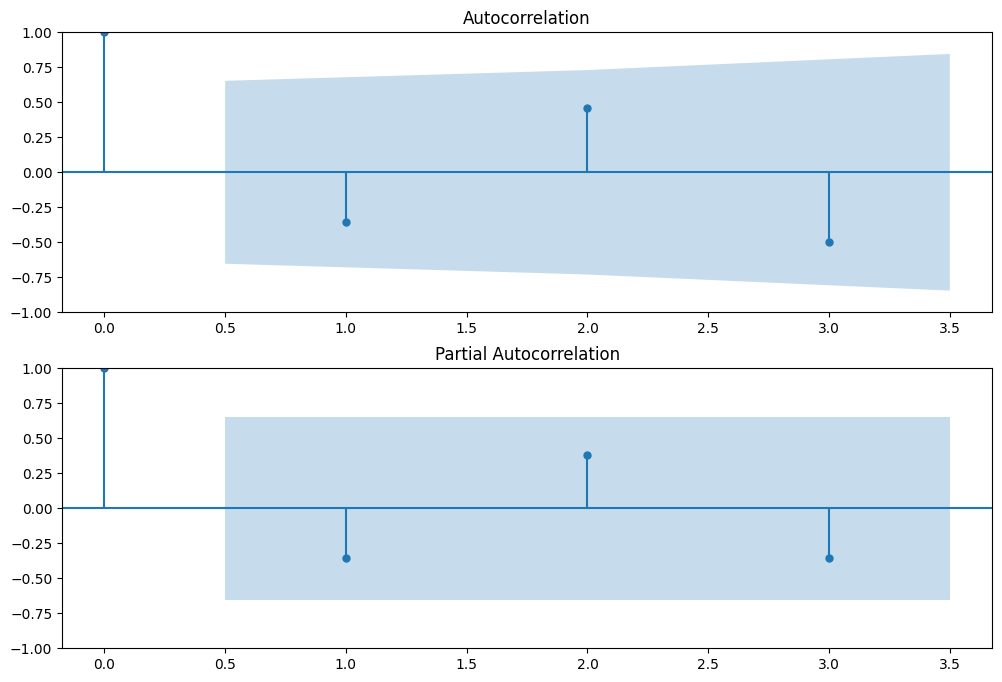

In [339]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_model_m['Seasonal First Difference'].dropna(),lags=3,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_model_m['Seasonal First Difference'].dropna(),lags=3,ax=ax2)

In [348]:
# For non-seasonal data
#p=1, d=1, q=0 or 1

import statsmodels.api as sm
model_d = sm.tsa.arima.ARIMA(df_model_d['Qty'], order=(1,1,2))
model_fit_d=model_d.fit()
model_fit_d.summary()

c:\Users\Axel\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Axel\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Axel\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    Qty   No. Observations:                  365
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -1542.753
Date:                Sun, 01 Oct 2023   AIC                           3093.506
Time:                        09:56:02   BIC                           3109.094
Sample:                    01-01-2022   HQIC                          3099.701
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9858      0.038    -25.850      0.000      -1.061      -0.911
ma.L1         -0.0050      0.050     -0.100      0.921      -0.104       0.094
ma.L2         -0.9599      0.050    -19.297      0.000      -1.057      -0.862
sigma2       278.4989     20.493     13.590      0.000     238.333     318.664
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                11.02
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               0.69   Skew:                             0.40
Prob(H) (two-sided):                  0.04   Kurtosis:                         3.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [349]:
# For non-seasonal data
#p=1, d=1, q=0 or 1

import statsmodels.api as sm
model_w = sm.tsa.arima.ARIMA(df_model_w['Qty'], order=(1,1,2))
model_fit_w=model_w.fit()
model_fit_w.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    Qty   No. Observations:                   53
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -287.171
Date:                Sun, 01 Oct 2023   AIC                            582.342
Time:                        09:56:18   BIC                            590.147
Sample:                    01-02-2022   HQIC                           585.334
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9909      0.540     -1.835      0.066      -2.049       0.067
ma.L1         -0.0031    192.705  -1.61e-05      1.000    -377.698     377.692
ma.L2         -0.9968    191.441     -0.005      0.996    -376.214     374.221
sigma2      3385.4259   6.51e+05      0.005      0.996   -1.27e+06    1.28e+06
===================================================================================
Ljung-Box (L1) (Q):                   1.35   Jarque-Bera (JB):               161.80
Prob(Q):                              0.24   Prob(JB):                         0.00
Heteroskedasticity (H):               0.32   Skew:                             2.17
Prob(H) (two-sided):                  0.02   Kurtosis:                        10.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [350]:
# For non-seasonal data
#p=1, d=1, q=0 or 1

import statsmodels.api as sm
model_m = sm.tsa.arima.ARIMA(df_model_m['Qty'], order=(1,1,2))
model_fit_m=model_m.fit()
model_fit_m.summary()

c:\Users\Axel\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Axel\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    Qty   No. Observations:                   12
Model:                 ARIMA(1, 1, 2)   Log Likelihood                 -62.659
Date:                Sun, 01 Oct 2023   AIC                            133.319
Time:                        09:56:52   BIC                            134.910
Sample:                    01-31-2022   HQIC                           132.315
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0000      0.001  -1120.309      0.000      -1.002      -0.998
ma.L1          1.1347      0.547      2.074      0.038       0.062       2.207
ma.L2          0.1415      0.456      0.310      0.756      -0.752       1.035
sigma2      3764.2554      0.000    2.4e+07      0.000    3764.255    3764.256
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 1.26
Prob(Q):                              0.91   Prob(JB):                         0.53
Heteroskedasticity (H):               0.56   Skew:                            -0.60
Prob(H) (two-sided):                  0.59   Kurtosis:                         1.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.28e+23. Standard errors may be unstable.
"""

<AxesSubplot:xlabel='Date'>

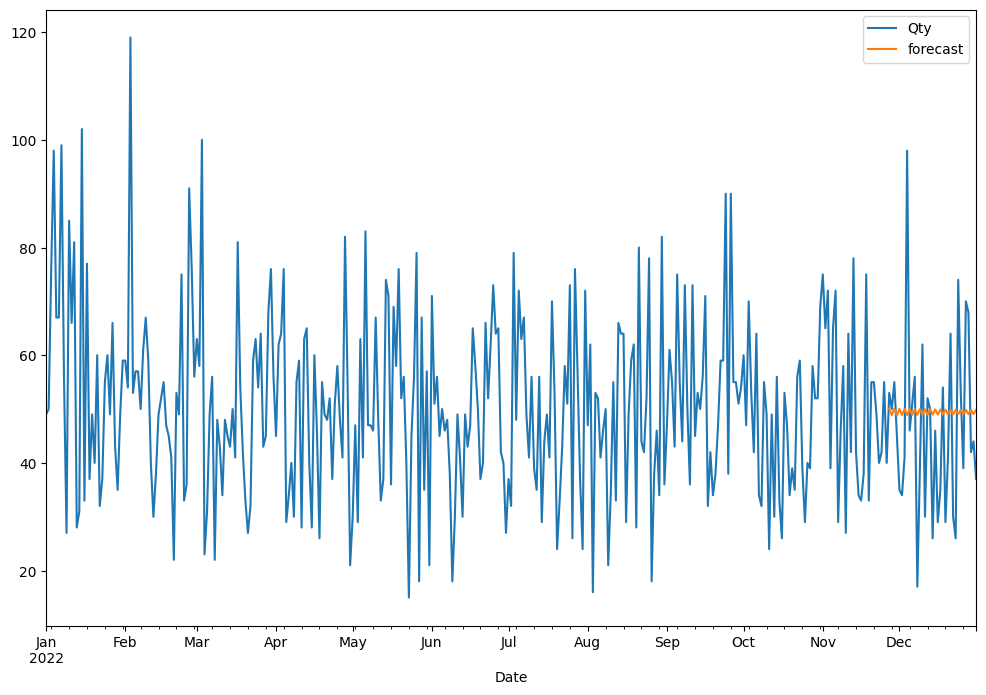

In [352]:
df_model_d['forecast']=model_fit_d.predict(start=330,end=364,dynamic=True)
df_model_d[['Qty','forecast']].plot(figsize=(12,8))

<AxesSubplot:xlabel='Date'>

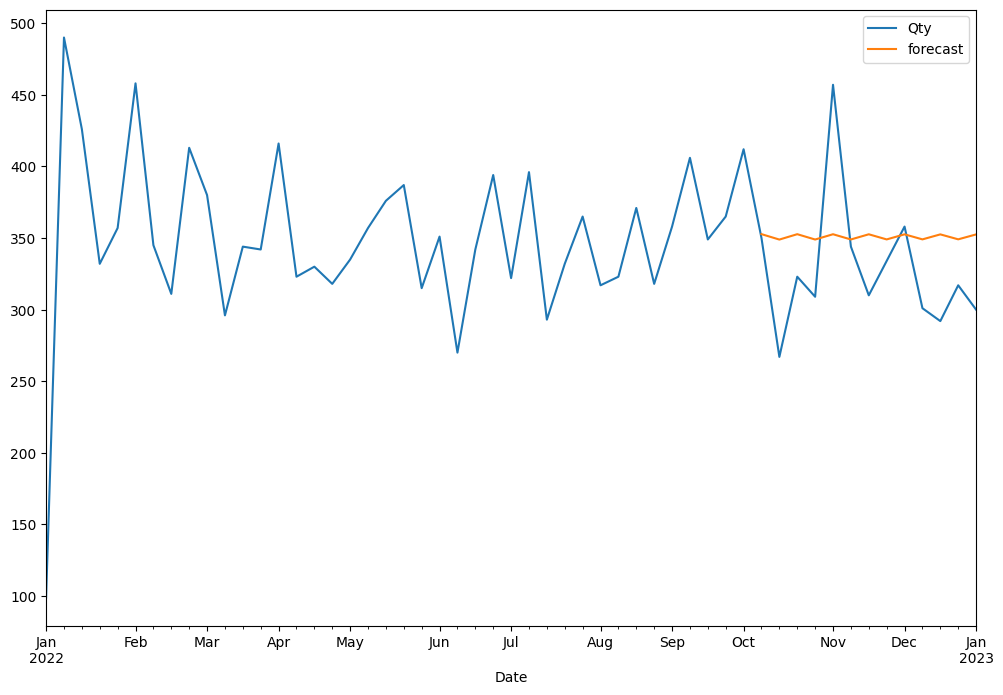

In [353]:
df_model_w['forecast']=model_fit_w.predict(start=40,end=52,dynamic=True)
df_model_w[['Qty','forecast']].plot(figsize=(12,8))

<AxesSubplot:xlabel='Date'>

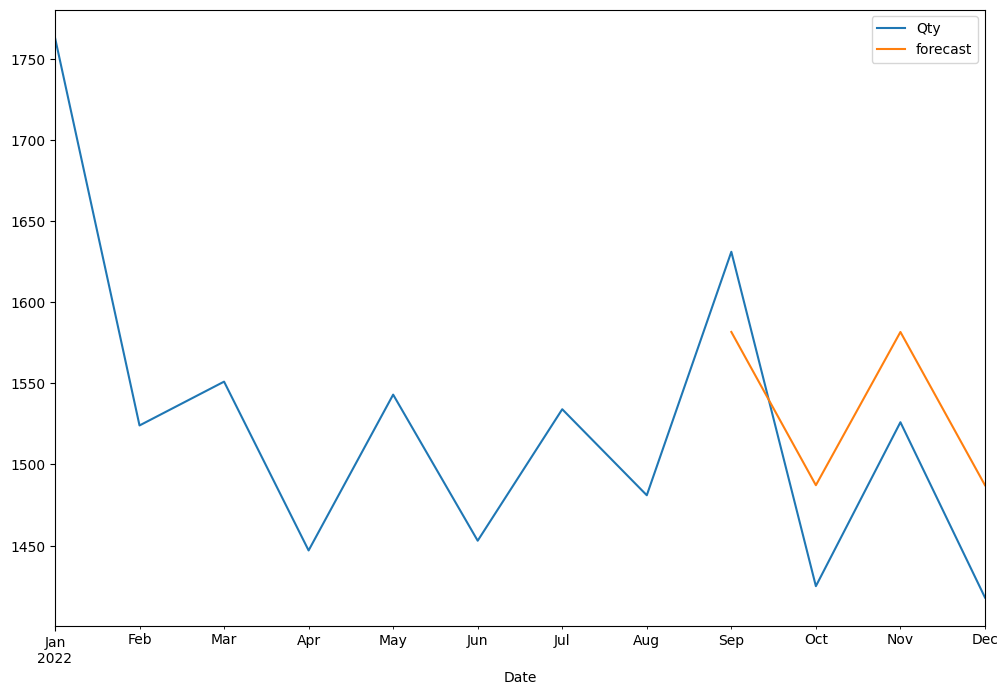

In [354]:
df_model_m['forecast']=model_fit_m.predict(start=8,end=12,dynamic=True)
df_model_m[['Qty','forecast']].plot(figsize=(12,8))

c:\Users\Axel\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Axel\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<AxesSubplot:xlabel='Date'>

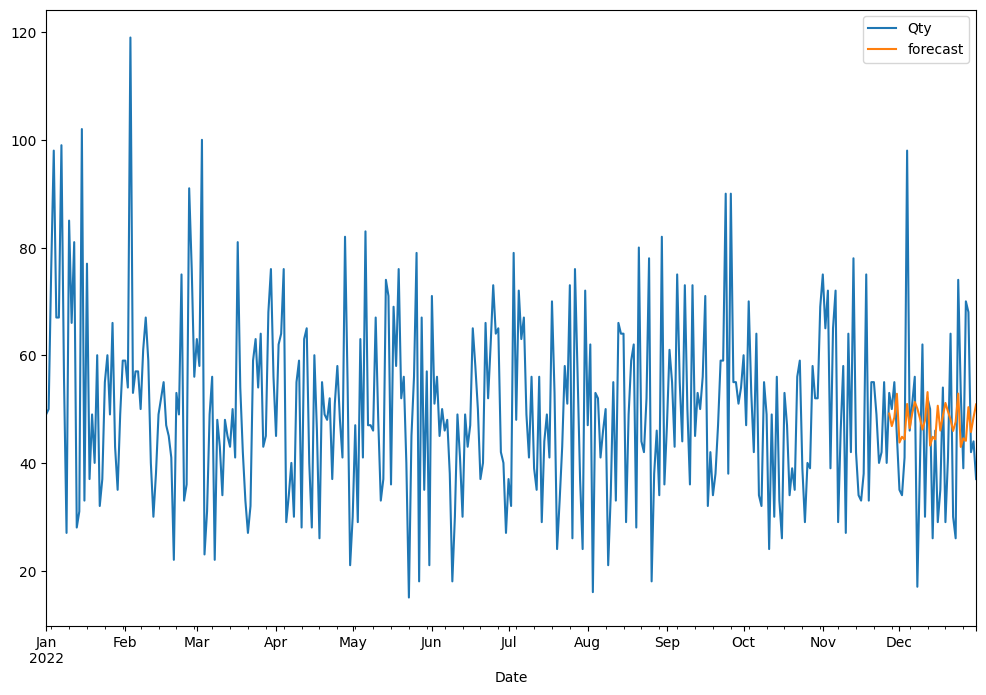

In [355]:
import statsmodels.api as sm
model_dd=sm.tsa.statespace.SARIMAX(df_model_d['Qty'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results_dd=model_dd.fit()
df_model_d['forecast']=results_dd.predict(start=330,end=364,dynamic=True)
df_model_d[['Qty','forecast']].plot(figsize=(12,8))

c:\Users\Axel\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


<AxesSubplot:xlabel='Date'>

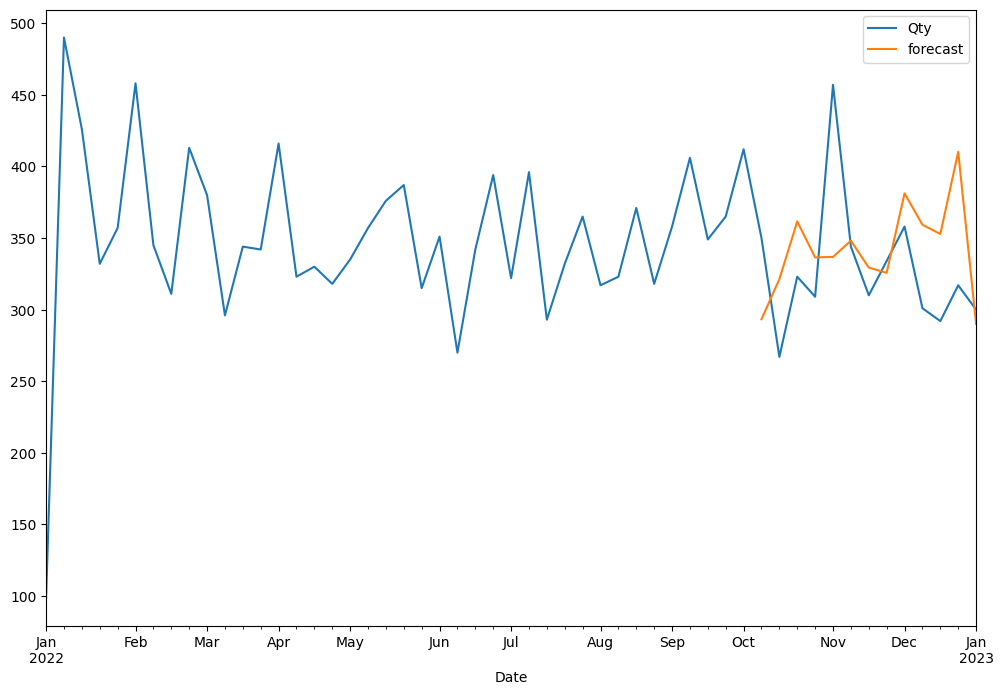

In [357]:
model_ww=sm.tsa.statespace.SARIMAX(df_model_w['Qty'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results_ww=model_ww.fit()
df_model_w['forecast']=results_ww.predict(start=40,end=52,dynamic=True)
df_model_w[['Qty','forecast']].plot(figsize=(12,8))

c:\Users\Axel\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\Axel\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<AxesSubplot:xlabel='Date'>

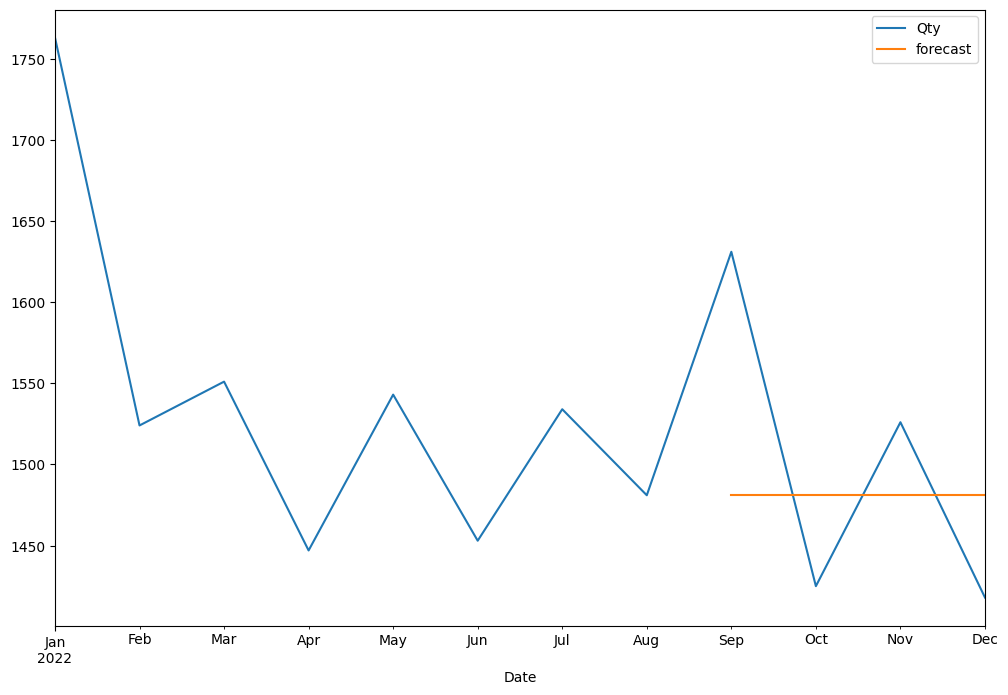

In [359]:
model_mm=sm.tsa.statespace.SARIMAX(df_model_m['Qty'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results_mm=model_mm.fit()
df_model_m['forecast']=results_mm.predict(start=8,end=12,dynamic=True)
df_model_m[['Qty','forecast']].plot(figsize=(12,8))

In [361]:
from pandas.tseries.offsets import DateOffset
future_dates_d=[df_model_d.index[-1]+ DateOffset(months=x)for x in range(0,24)]
future_datest_df_d=pd.DataFrame(index=future_dates_d[1:],columns=df_model_d.columns)


In [362]:
future_datest_df_d.tail()

,Qty,Sales First Difference,Seasonal First Difference,forecast
2024-07-31,NaN,NaN,NaN,NaN
2024-08-31,NaN,NaN,NaN,NaN
2024-09-30,NaN,NaN,NaN,NaN
2024-10-31,NaN,NaN,NaN,NaN
2024-11-30,NaN,NaN,NaN,NaN


In [363]:
future_df_d=pd.concat([df_model_d,future_datest_df_d])

<AxesSubplot:>

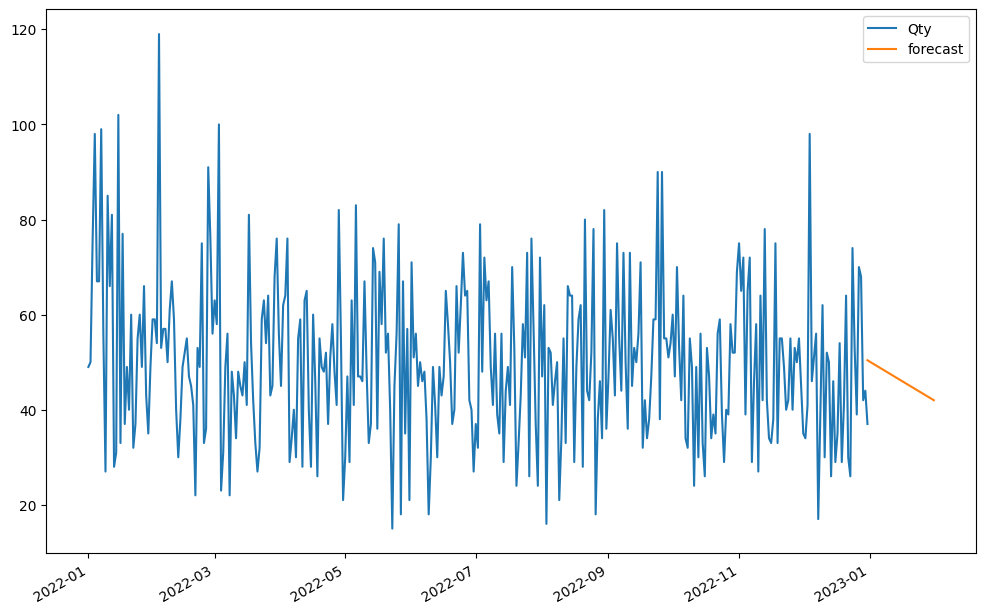

In [364]:
future_df_d['forecast'] = results_dd.predict(start = 364, end = 400, dynamic= True)
future_df_d[['Qty', 'forecast']].plot(figsize=(12, 8))

#### Clustering

In [365]:
df_cluster = df_merge.copy()

In [366]:
df_cluster.columns

Index(['TransactionID', 'CustomerID', 'Date', 'ProductID', 'Price', 'Qty',
       'TotalAmount', 'StoreID', 'Age', 'Gender', 'Marital Status', 'Income',
       'Product Name', 'StoreName', 'GroupStore', 'Type', 'Latitude',
       'Longitude'],
      dtype='object')

In [370]:
df_cluster = df_cluster.groupby('CustomerID').agg({'TransactionID' : 'count', 'Qty' : 'sum', 'TotalAmount' : 'sum'})

In [382]:
df_cluster.head()

,TransactionID,Qty,TotalAmount
CustomerID,,,
1,17,60,623300
2,13,57,392300
3,15,56,446200
4,10,46,302500
5,7,27,268600


In [377]:
# Import package for KMeans
from sklearn.cluster import KMeans
import seaborn as sns

In [376]:
# Create place holder for inertia (empty list)
inertia = []

# Iteration
for k in range(1, 11):
    # Create k means
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)

    # Fit the object
    kmeans.fit(df_cluster)

    # Append the result
    inertia.append(kmeans.inertia_)

Text(0.5, 1.0, 'Elbow Method Showing the Optimal K')

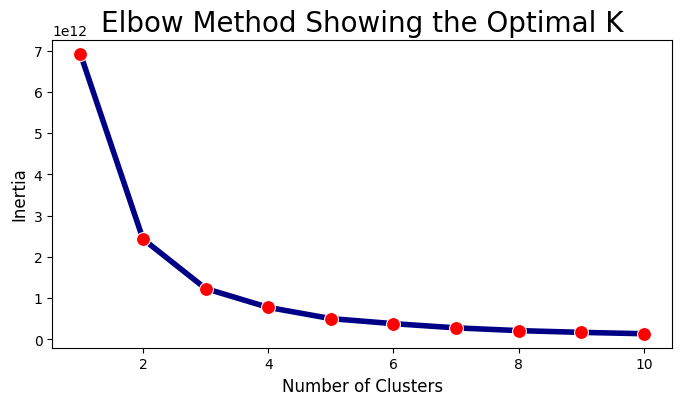

In [378]:
plt.figure(figsize=(8,4))

# plt.plot(inertia)
sns.lineplot(x=range(1,11), y=inertia, color='#000087',
             linewidth = 4, marker='o', markersize=10,
             markerfacecolor='red')

plt.xlabel('Number of Clusters', fontsize = 12)
plt.ylabel('Inertia', fontsize=12)
plt.title('Elbow Method Showing the Optimal K', fontsize=20)

In [379]:
# Fit for the best data
best_kmeans_cluster = KMeans(n_clusters=3,
                             random_state=42,
                             n_init=10) # Number of times the k-means algorithm will be run with different initial centroids

# Fit the model
best_kmeans_cluster.fit(df_cluster)

KMeans(n_clusters=3, random_state=42)

In [380]:
# Prediction
label_data = best_kmeans_cluster.predict(df_cluster)
label_data

array([2, 0, 0, 1, 1, 0, 2, 2, 0, 2, 1, 2, 2, 0, 0, 0, 0, 0, 2, 2, 1, 0,
       2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 2, 1, 0, 1, 1, 0, 2, 2,
       2, 2, 2, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 2, 1, 1, 0,
       0, 1, 0, 0, 1, 2, 2, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2,
       2, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 2, 2, 0, 1, 1,
       1, 2, 1, 2, 2, 0, 1, 0, 0, 2, 0, 1, 1, 0, 1, 1, 2, 1, 0, 0, 0, 0,
       2, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 2, 0, 0, 1, 0,
       0, 2, 2, 2, 1, 0, 0, 0, 0, 1, 0, 2, 2, 0, 0, 1, 2, 2, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 2, 1, 0, 2, 1, 2, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       2, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 2, 0, 1, 0, 0, 0, 1, 2, 0, 2, 1,
       0, 2, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2, 1, 1,
       0, 0, 2, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 2, 1, 1, 2, 2,
       1, 1, 0, 0, 0, 2, 1, 2, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 2, 1, 2,

In [381]:
# Generate the coordinate centroid
centroids = best_kmeans_cluster.cluster_centers_

In [383]:
# Create DataFrame
df_centroid = pd.DataFrame(centroids,
                           columns=['TransactionID', 'Qty', 'TotalAmount']).rename_axis('Cluster', axis='index')

# Centroid DataFrame
df_centroid

,TransactionID,Qty,TotalAmount
Cluster,,,
0,11.752688,42.779570,384003.225806
1,8.508772,29.888889,241425.730994
2,15.322222,58.088889,548162.222222


- Cluster 0 --> Middle Customer
    - Characteristic : Medium Quantity, Medium Frequency, Medium Monetary
- Cluster 1 --> Highly Potential Churn
    - Characteristic : Low Quantity, Low Frequency, Low Monetary
- Cluster 2 --> Enthusiastic Customer
    - Characteristic : High Quantity, High Frequency, High Monetary

In [384]:
# Create data
df_cluster['label'] = label_data
df_cluster.head()

,TransactionID,Qty,TotalAmount,label
CustomerID,,,,
1,17,60,623300,2
2,13,57,392300,0
3,15,56,446200,0
4,10,46,302500,1
5,7,27,268600,1


In [385]:
# Create function to assign the label
def assign_label(value):
    """
    Function to assign cluster label
    
    Parameters:
    ----------    
    value : int
        Number cluster

    Returns:
    --------
    label : str
        Label of cluster (Middle Customer, Highly Potential Churn, and Enthusiastic Customer)
    
    """
    if value == 0:
        return "Middle Customer"
    elif value == 1:
        return "Highly Potential Churn"
    else:
        return "Enthusiastic Customer"
# Create a column 'Customer_Type' based on 'K_Cluster' values
df_cluster["Customer_Type"] = df_cluster['label'].apply(assign_label)

# Check the result
df_cluster.head()

,TransactionID,Qty,TotalAmount,label,Customer_Type
CustomerID,,,,,
1,17,60,623300,2,Enthusiastic Customer
2,13,57,392300,0,Middle Customer
3,15,56,446200,0,Middle Customer
4,10,46,302500,1,Highly Potential Churn
5,7,27,268600,1,Highly Potential Churn


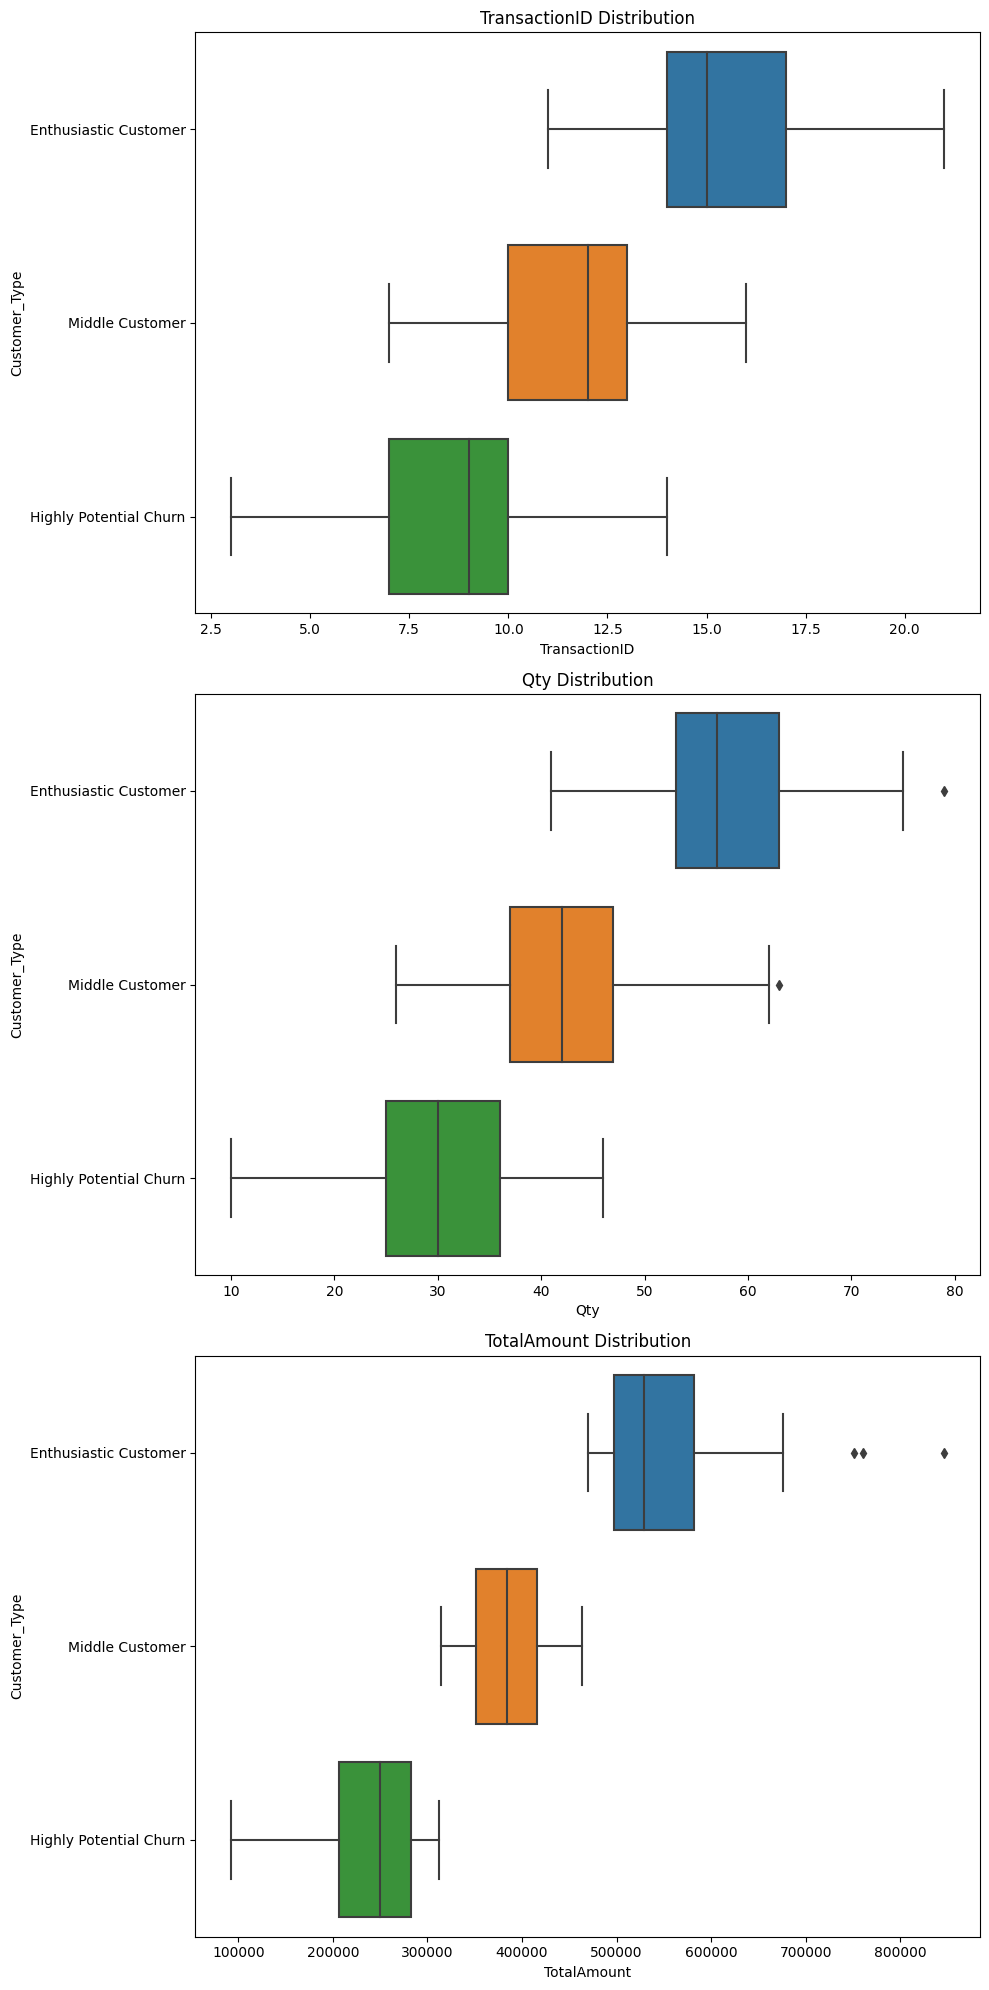

In [387]:
# Plot the boxplot
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10,20))

# Iterate to all columns
for i, column in enumerate(['TransactionID', 'Qty', 'TotalAmount']):
    sns.boxplot(data = df_cluster,
                y = 'Customer_Type',
                x = column,
                ax = axes[i])
    
    axes[i].set_title(f'{column} Distribution')

plt.tight_layout()
plt.show()

**General Recommendation**

**Enthusiastic Customer**

---

- General Characteristic (high quantity, high frequency & monetary)
  - Quantity : 58 item
  - Frequency : 15 transactions
  - Monetary : \Rp. 548.162

- General marketing initiatives:
  - Provide tailored product suggestions based on their previous purchases.
  - Establish a customer loyalty program with tiers of prizes and special advantages.

**Middle Customers**

---

- General Characteristic (medium quantity, medium frequency & monetary)
  - Quantity : 43 days
  - Frequency : 12 transactions 
  - Monetary : \Rp. 348.003


- General marketing initiatives:
  - Encourage people to sample your goods or services by providing them with introductory discounts.

**Highly Potential Churn**

---

- General Characteristic (low quantity, low frequency & monetary)
  - Quantity : 29 days
  - Frequency : 9 transactions
  - Monetary : \Rp. 241.425


- General Marketing initiative:
  - Implement a proactive customer outreach program to answer any complaints or issues they may have. 
  - Conduct surveys or feedback campaigns to better understand their wants and preferences. 
  - Use discount promotional campaigns to entice them to make a purchase.